In [46]:
import pandas as pd
import numpy as np

# vizualization
import seaborn as sea  
import matplotlib.pyplot as plt
%matplotlib inline


# normalization and test sample
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  algorithm
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# task 1 - розмір та назви колонок
# посилання на датасет на kaggle(також датасет завантожений на гітхаб у вигляді файла):
# https://www.kaggle.com/datasets/meerashareef/apple-revenue-from-1980-to-2022/download?datasetVersionNumber=1
apple_df = pd.read_csv("../input/apple-revenue-from-1980-to-2022/applerevenue .csv")
print(apple_df.shape)
print(apple_df.columns)

(10559, 7)
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'profit or not'], dtype='object')


In [48]:
# task 2 - опрацювання пропусків
apple_df.isnull().sum()
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB


**Немає пропусків**

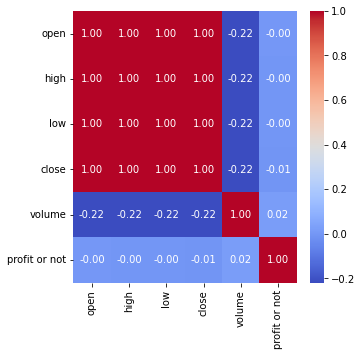

In [49]:
# task 3 - візуалізація датасету
correlation = apple_df.corr()
fig, ax = plt.subplots(figsize=(5, 5))
sea.heatmap(correlation,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

**1 - кореляції ознак між собою та цільовою змінною**

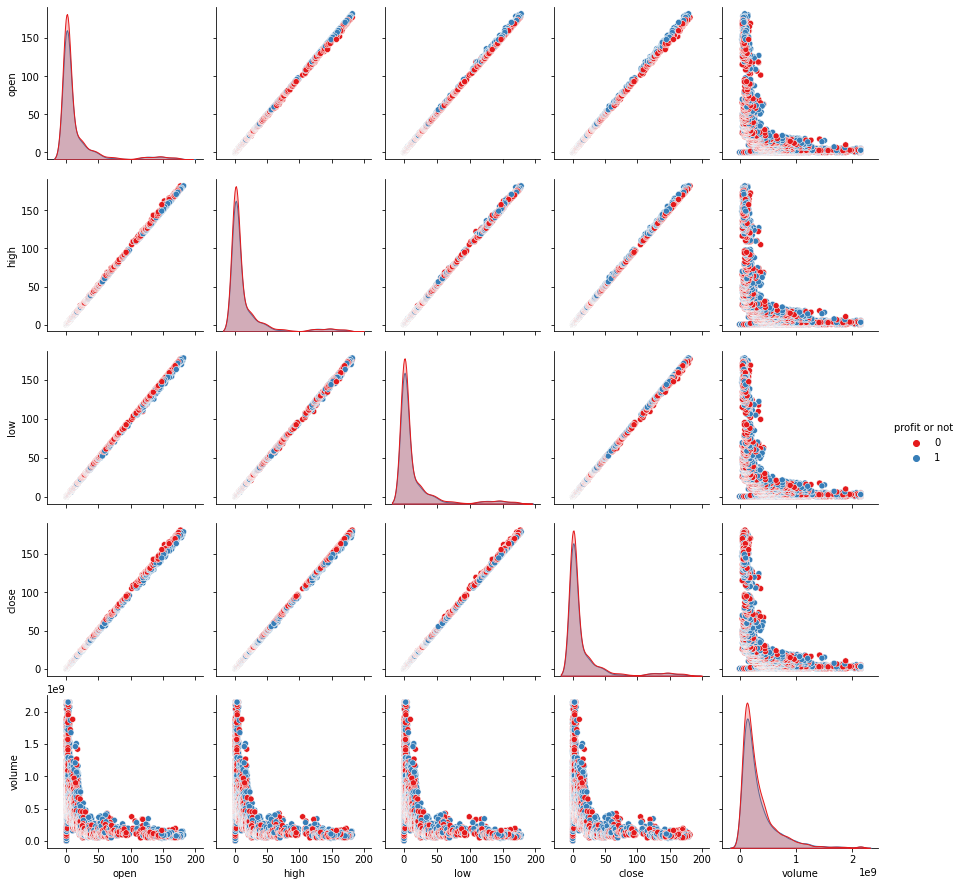

In [50]:
sea.pairplot(apple_df, hue="profit or not", palette = 'Set1')

**2 - розподіл ознак**

In [65]:
# drop date column
apple_df = apple_df.drop(["date"], axis=1)

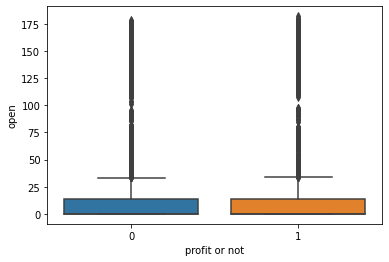

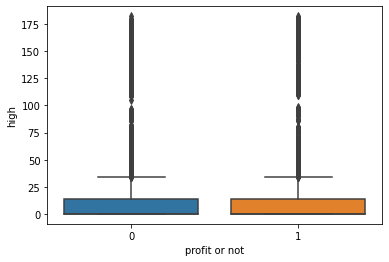

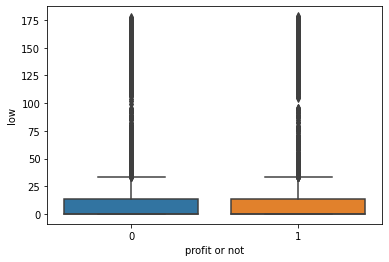

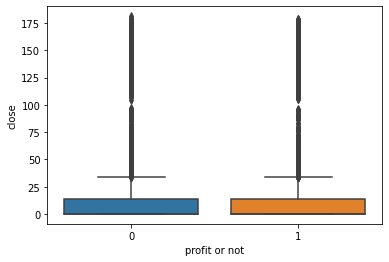

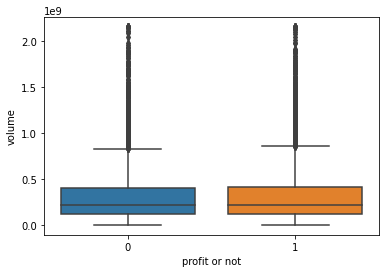

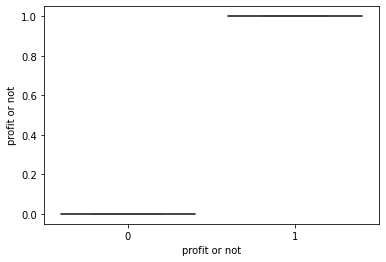

In [66]:
for i in apple_df.columns:
    figure = plt.figure()
    sea.boxplot(x='profit or not', y=apple_df[i], data=apple_df)

In [ ]:
X = apple_df.drop(["profit or not"], axis=1)
y = apple_df["profit or not"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape)
print(y_train.shape)

**розділяємо датафрейм на дві частини - для навчання класифікаторів та їх перевірки**

In [ ]:
# task 4 - нормалізація даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
# task 5.1 - kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [53]:
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.5154671717171717
[[912 747]
 [788 721]]
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1659
           1       0.49      0.48      0.48      1509

    accuracy                           0.52      3168
   macro avg       0.51      0.51      0.51      3168
weighted avg       0.51      0.52      0.52      3168



**Знайдемо опитимальне число сосідів**

In [55]:
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

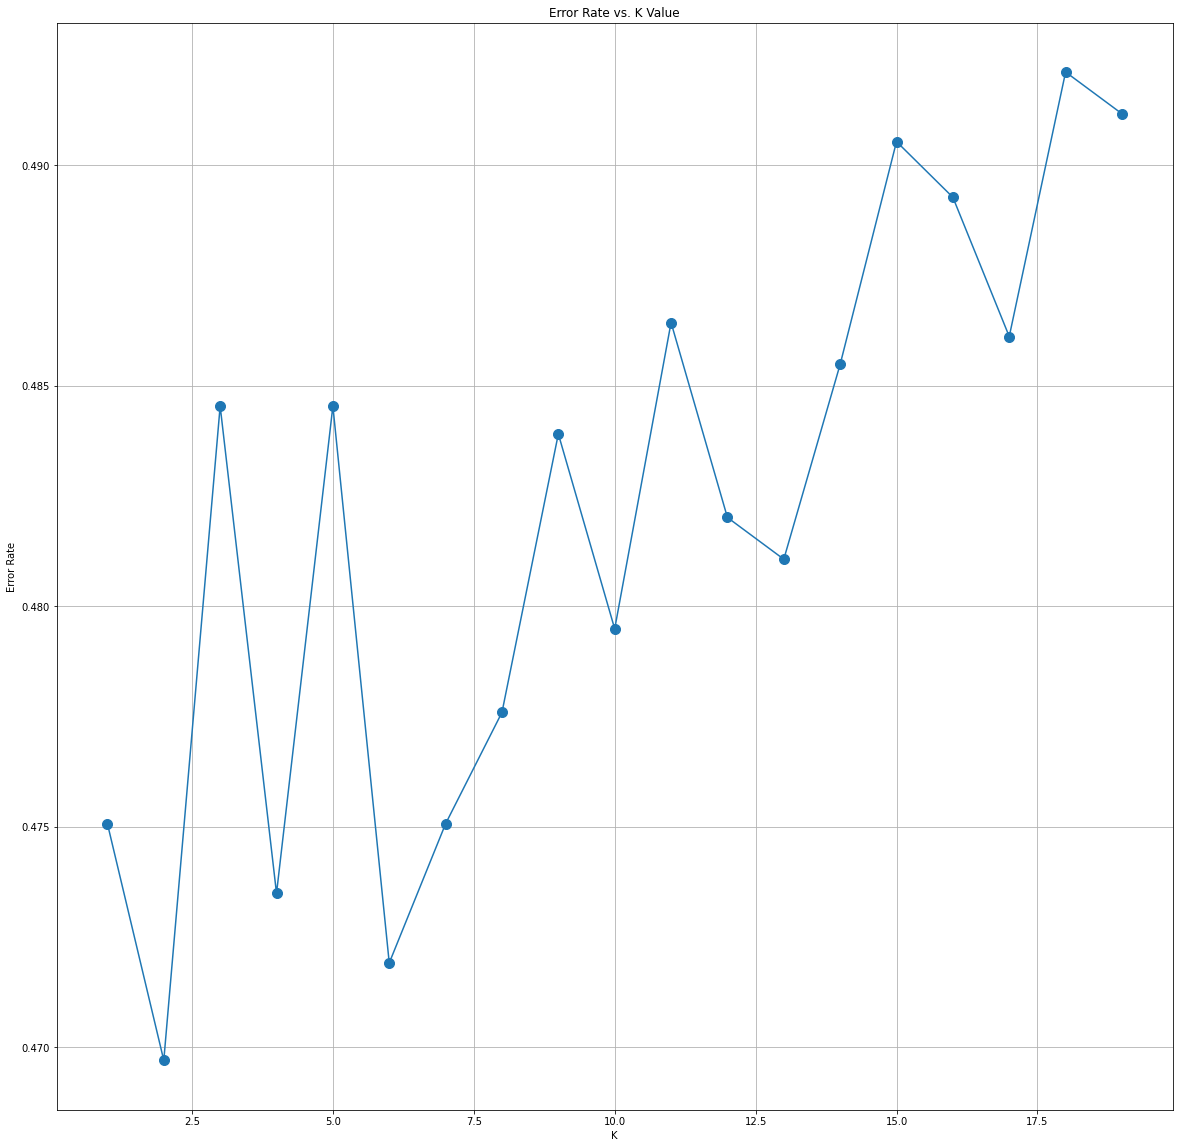

In [61]:
plt.figure(figsize=(20,20))
plt.plot(range(1,20), error, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [62]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [63]:
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.5303030303030303
[[1305  354]
 [1134  375]]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64      1659
           1       0.51      0.25      0.34      1509

    accuracy                           0.53      3168
   macro avg       0.52      0.52      0.49      3168
weighted avg       0.53      0.53      0.49      3168

